In [15]:
# First, install the autoreload extension
%load_ext autoreload
# Set autoreload to automatically reload modules
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from algorithm import FPR_workload as workload




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
    
data = pd.read_csv('../../../data/compas/preprocessed/cox-parsed_7214rows_with_labels_sorted_by_dates.csv')
print(data["race"].unique())
# get distribution of compas_screening_date
data['compas_screening_date'] = pd.to_datetime(data['compas_screening_date'])
# data['compas_screening_date'].hist()
date_column = "compas_screening_date"
time_window_str = "1 month"
monitored_groups = [{"race": 'Caucasian'}, {"race": 'African-American'}, {"race": "Asian"}, {"race": "Hispanic"}, {"race": "Other"}, {"race": "Native American"}]
alpha = 0.5
threshold = 0.3


# use CR for compas dataset, a time window = 1 month, record the result of each uf in each month and draw a plot
DFMonitor, uf_list, fpr_list, counter_list_TN, counter_list_FP = workload.traverse_data_DFMonitor(data, date_column, time_window_str, monitored_groups, threshold, alpha)


['Caucasian' 'African-American' 'Other' 'Hispanic' 'Asian'
 'Native American']


In [17]:
fpr_list

[[0.2971014492753623,
  0.5485714285714286,
  0.3333333333333333,
  0.2413793103448276,
  0.2,
  1.0],
 [0.3074712643678161,
  0.5333333333333333,
  0.1111111111111111,
  0.23809523809523808,
  0.125,
  0.2],
 [0.2661290322580645,
  0.5114309906858594,
  0.058823529411764705,
  0.2398190045248869,
  0.23076923076923078,
  0.1111111111111111],
 [0.23834019204389575,
  0.48927277793257173,
  0.2727272727272727,
  0.20496894409937888,
  0.21495327102803738,
  0.36],
 [0.22246022031823745,
  0.4699314894696777,
  0.2727272727272727,
  0.20951509606587373,
  0.226890756302521,
  0.36],
 [0.22860262008733626,
  0.4780842420354928,
  0.2727272727272727,
  0.21216509775524983,
  0.22012578616352202,
  0.36],
 [0.2876268813440672,
  0.4739556847075917,
  0.09278350515463918,
  0.2347623213764946,
  0.10303030303030303,
  0.36],
 [0.2371291222991833,
  0.44693148167058105,
  0.012211668928086838,
  0.17415680341728218,
  0.10461718293395675,
  0.36],
 [0.23093291334360969,
  0.441328811250337,
 

In [18]:
uf_list1, fpr_list1, counter_list_TN1, counter_list_FP1 = workload.FPR_traditional(data, date_column, time_window_str, monitored_groups, threshold)

In [19]:
fpr_list1

[[0.2971014492753623,
  0.5485714285714286,
  0.3333333333333333,
  0.2413793103448276,
  0.2,
  1.0],
 [0.3142857142857143,
  0.5257142857142857,
  0.0,
  0.23684210526315788,
  0.09090909090909091,
  0.0],
 [0.23846153846153847,
  0.49390243902439024,
  0.0,
  0.2413793103448276,
  0.30434782608695654,
  0.0],
 [0.2265625,
  0.47840531561461797,
  0.5,
  0.1917808219178082,
  0.20588235294117646,
  0.5],
 [0.09090909090909091,
  0.2727272727272727,
  None,
  0.2222222222222222,
  0.3333333333333333,
  None],
 [0.24390243902439024,
  0.5217391304347826,
  None,
  0.2222222222222222,
  0.2,
  None],
 [0.32710280373831774,
  0.47183098591549294,
  0.0,
  0.25,
  0.047619047619047616,
  None],
 [0.215962441314554,
  0.43636363636363634,
  0.0,
  0.14754098360655737,
  0.10526315789473684,
  None],
 [0.21951219512195122,
  0.42857142857142855,
  0.0,
  0.29411764705882354,
  0.0,
  0.5],
 [0.16417910447761194,
  0.2815533980582524,
  0.0,
  0.47619047619047616,
  0.05,
  None],
 [0.212121

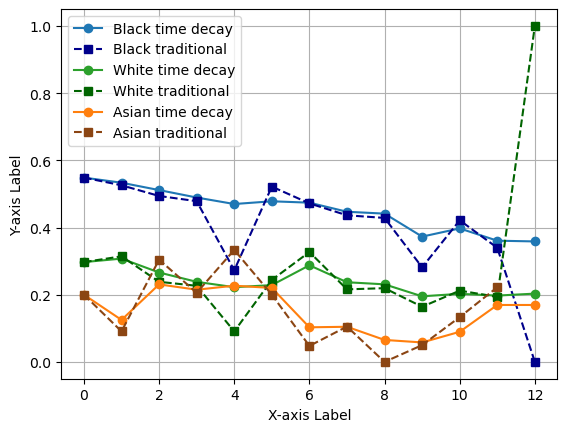

In [38]:
# draw chart of the first and second value in all lists in fpr_list and fpr_list1
# 'Caucasian' 'African-American' 'Other' 'Hispanic' 'Asian' 'Native American'
black_time_decay = [x[1] for x in fpr_list]
black_traditional = [x[1] for x in fpr_list1]
white_time_decay = [x[0] for x in fpr_list]
white_traditional = [x[0] for x in fpr_list1]
asian_time_decay = [x[4] for x in fpr_list]
asian_traditional = [x[4] for x in fpr_list1]

x_list = np.arange(0, len(fpr_list))
pair_colors = ['#1f77b4', '#00008b', '#2ca02c', '#006400', '#ff7f0e', '#8b4513']


# Plot the first curve (y1_values)
plt.plot(x_list, black_time_decay, label='Black time decay', linestyle='-', marker='o', color=pair_colors[0])

# Plot the second curve (y2_values)
plt.plot(x_list, black_traditional, label='Black traditional', linestyle='--', marker='s', color=pair_colors[1])


plt.plot(x_list, white_time_decay, label='White time decay', linestyle='-', marker='o', color=pair_colors[2])
plt.plot(x_list, white_traditional, label='White traditional', linestyle='--', marker='s', color=pair_colors[3])

plt.plot(x_list, asian_time_decay, label='Asian time decay', linestyle='-', marker='o', color=pair_colors[4])
plt.plot(x_list, asian_traditional, label='Asian traditional', linestyle='--', marker='s', color=pair_colors[5])


plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
# plt.title('Simple Curve Chart')
plt.grid(True)
plt.legend()
plt.show()

In [24]:
print(sum(black_traditional) / len(black_traditional))


0.40158306484320466


In [33]:
# FPR for African-American in dataset
AA_data = data[data["race"] == 'African-American']
print(len(AA_data))
total_FP = len(AA_data[(AA_data['predicted'] == True) & (AA_data["ground_truth"] == False)])
print(total_FP)
total_TN = len(AA_data[(AA_data['predicted'] == False) & (AA_data["ground_truth"] == False)])
print(total_TN)
print("total fpr of AA: {}".format(total_FP / (total_FP + total_TN)))


3696
805
990
total fpr of AA: 0.44846796657381616


[autoreload of algorithm.FPR_workload failed: Traceback (most recent call last):
  File "/Users/jinyangli/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/jinyangli/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/Users/jinyangli/opt/anaconda3/lib/python3.9/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/jinyangli/opt/anaconda3/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/Users/jinyangli/OngoingProjects/Project4/DFMonitor/algorithm/FPR_workload.py", line 316, in <module>
    data = pd.read_csv('..